# Women's E-Commerce Clothing Reviews

# 前書き

コンテキスト  
ようこそ。これは、顧客が作成したレビューを中心に、Women's Clothing Eコマースのデータセットです。その9つのサポート機能は、複数の次元でテキストを解析する素晴らしい環境を提供します。これは実際の商業データであるため、匿名化されており、レビューテキストおよび本文の会社への参照は「小売業者」に置き換えられています。  

コンテンツ  
このデータセットには、23486行と10個のフィーチャ変数が含まれています。各行は顧客レビューに対応し、変数を含みます。  

Clothing ID：Integerレビュー対象の特定の作品を参照するカテゴリ変数。  
年齢：評価者の正の整数変数。  
Title：レビューのタイトルの文字列変数。  
Review Text：レビュー本文の文字列変数。  
評価：お客様が1ワーストから5ベストまで付与した製品スコアのポジティブ序数整数変数。  
Recommended IND：1が推奨される製品を推奨するバイナリ変数、0は推奨されません。  
Positive Feedback Count：正の整数で、このレビューが陽性であった他の顧客の数を記録します。  
部門名：製品の上位部門のカテゴリ名。  
部門名：製品部門名のカテゴリ名。    
クラス名：製品クラス名のカテゴリ名。    
謝辞    
匿名だが、実際の情報源  

インスピレーション  
私は質のNLPを楽しみにしています！フィーチャエンジニアリングや多変量解析には、いくつかの大きなチャンスがあります。  

出版物  
双方向リカレントニューラルネットワークを用いたセンチメント分類による電子商取引レビューの統計分析  
Abien Fred Agarap  -  Github  

## 目的
今回はデータの中からRating(レビューの良し悪し)を予測して行きたいと思います。  

## 進行手順
このカーネルは以下の手順で進めて行きます。

1. 問題の定義
1. データの探索
1. データの処理
1. 学習
1. 予測

# 事前知識

## コーパスとは
コーパスとは大量のテキストデータの事を言います。  
自然言語処理では大量に集めてきたテキスト（コーパス）を使い学習を行います。

## カウントベースの手法(Count vec)とは
カウントベースの手法とは、テキスト内の単語頻度をカウントし、高頻度(時には低頻度)の単語をテキストから除去します。  
高頻度の単語を除去するのは、それらの単語がテキスト中で占める割合が高い一方、役に立たないからです。  
このように出来たデータから単語頻度をカウントし学習データにする手法を言います。

## tfidvector(相互情報量)とは
カウントベースでは沢山使われている単語（私や　は、など）が重要となってしまう欠点がありました。  
それを解消する方法として相互情報量という手法で単語をベクトル化する手法が生まれました。　　
$$I(X;Y)\\ 
=\displaystyle\sum_{x\in X}\sum_{y\in Y}P_{X,Y}(x,y)\log\dfrac{P_{X,Y}(x,y)}{P_X(x)P_Y(y)}$$



# 必要なライブラリのインポート

In [1]:
import nltk
import numpy as np
import re
from nltk.corpus import stopwords
from pandas import read_csv
import collections
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
from tqdm import tqdm

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# データのインポート

In [4]:
dataset = read_csv('Womens Clothing E-Commerce Reviews.csv')
reviews = dataset['Review Text'].astype('str')
recommend = dataset['Recommended IND']


REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def review_prepare(review):
    review = review.lower()# lowercase text
    review = re.sub(REPLACE_BY_SPACE_RE," ",review)# replace REPLACE_BY_SPACE_RE symbols by space in text
    review = re.sub(BAD_SYMBOLS_RE,"",review)# delete symbols which are in BAD_SYMBOLS_RE from text
    review = re.sub(' +',' ',review)
    review = " ".join([word for word in review.split() if word not in STOPWORDS]) # delete stopwords from text
    return review

reviews_prepared = [review_prepare(review) for review in reviews]

In [5]:
train = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

# データ探索
まずデータを確認し全体を把握しましょう

In [6]:
train.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
train.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

全部で23486のデータがあります。   
またレビューに欠損が含まれていることがわかりました。  
今回は自然言語処理の練習の為、レビューを使います。  
なのでレビューの欠損しているデータは削除しましょう。

In [9]:
train = train.dropna(subset=["Review Text"])

In [10]:
train.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

これでレビューの欠損をなくすことができました。  
それでは今回分類するターゲットを分けましょう。

In [11]:
target = train.Rating
train = train.drop("Rating",axis = 1)

これでデータを分けることができました。  
さらに詳しくデータを探索して行きましょう。

In [12]:
train.describe()

,Unnamed: 0,Clothing ID,Age,Recommended IND,Positive Feedback Count
count,22641.000000,22641.000000,22641.000000,22641.000000,22641.000000
mean,11740.849035,919.332362,43.280376,0.818868,2.630582
std,6781.957509,202.266874,12.326980,0.385136,5.786164
min,0.000000,1.000000,18.000000,0.000000,0.000000
25%,5872.000000,861.000000,34.000000,1.000000,0.000000
50%,11733.000000,936.000000,41.000000,1.000000,1.000000
75%,17621.000000,1078.000000,52.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,1.000000,122.000000


平均年齢は43才であることがわかりました。  
Recommended INDは顧客がその商品をオススメしているかの指標になり、多くの人が良い商品だとオススメしていることがわかりました。  
まずは利用者の分布を可視化しましょう。  
また逆にどの年齢層の人が批判的な意見が多いかを見て行きましょう。


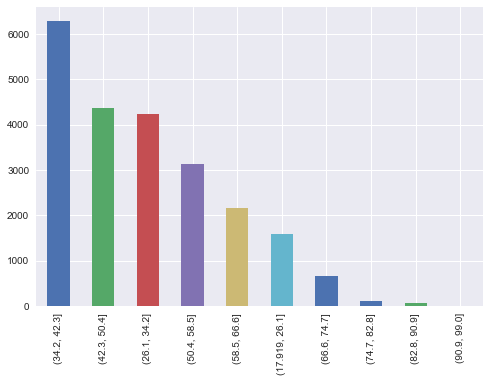

In [13]:
pd.cut(train.Age,bins=10).value_counts().plot.bar()

In [14]:
age = pd.cut(train.Age[(train["Recommended IND"]==0)],bins=10)

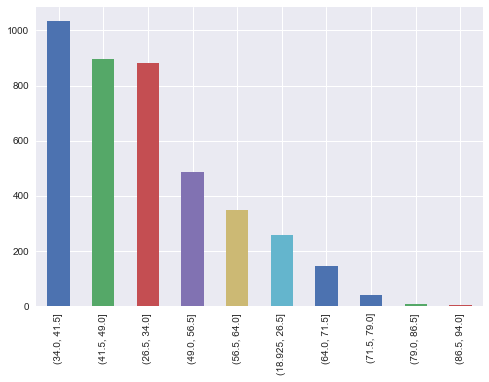

In [15]:
age.value_counts().plot.bar()

34才から41才までが批判的な意見が多いことが分かりました。  
利用者層のとの比率を比較してみましょう。

In [16]:
ages = pd.cut(train.Age,bins=10).value_counts().sort_index()

In [17]:
age.value_counts().sort_index().values

array([ 257,  882, 1033,  895,  487,  349,  144,   41,    8,    5])

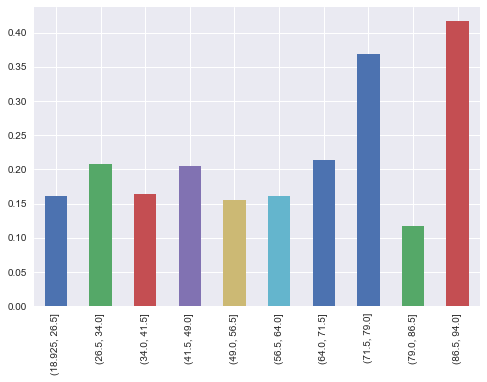

In [18]:
(age.value_counts().sort_index()/ages.values).plot.bar()

このように見ると７０代と高齢者は約４割が批判的な意見だと分かりました。

次にClass Nameなどはonehotencoderを掛けてratingとの相関を見てみ行きましょう。

In [19]:
train = train.join(pd.get_dummies(train[["Class Name","Division Name","Department Name"]])
          ).drop(["Class Name","Division Name","Department Name"],axis = 1)

In [20]:
#target = pd.get_dummies(target)

In [21]:
corr = train.join(target)

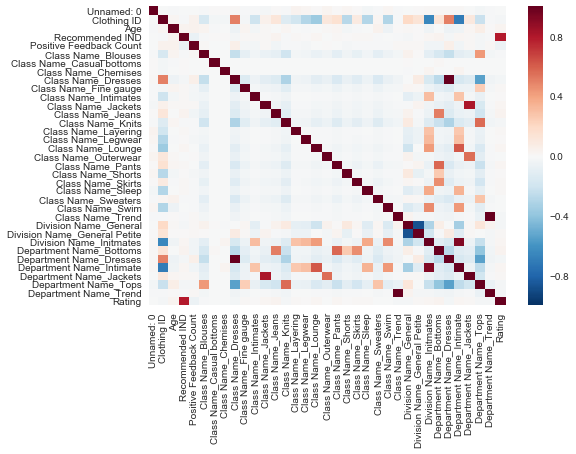

In [22]:
sns.heatmap(corr.corr())

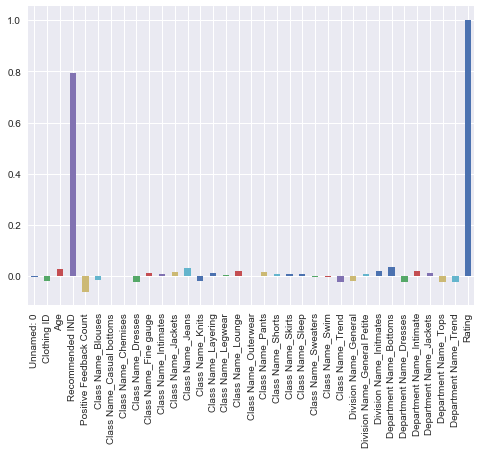

In [23]:
corr.corr().Rating.plot.bar()

ターゲットに対してRecommended INDだけ相関があることがわかりました。  
他のデータは相関があまり出なかったので今回は削除しましょう

In [24]:
train = train[["Review Text","Recommended IND"]]

In [25]:
train.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


# データの前処理　コーパスの作成

次は自然言語処理に使うコーパスを作って行きましょう。  
ドットの前にスペースを入れ’以外の記号は削除しましょう。

In [26]:
import re

In [27]:
reviw = []
for e,i in enumerate(tqdm(train["Review Text"])):
    i = i.lower()
    i = re.sub("[^a-z .']","",i).replace("."," .")
    train["Review Text"].loc[e] = i

  0%|          | 0/22641 [00:00<?, ?it/s]/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 22641/22641 [00:21<00:00, 1033.25it/s]


In [28]:
train

,Review Text,Recommended IND
0,absolutely wonderful silky and sexy and comfo...,1
1,love this dress it's sooo pretty . i happene...,1
2,i had such high hopes for this dress and reall...,0
3,i love love love this jumpsuit . it's fun flir...,1
4,this shirt is very flattering to all due to th...,1
5,i love tracy reese dresses but this one is not...,0
6,i aded this in my basket at hte last mintue to...,1
7,i ordered this in carbon for store pick up and...,1
8,i love this dress . i usually get an xs but it...,1
9,i'm ' and lbs . i ordered the s petite to mak...,1


In [36]:
change = {1:0,2:1,3:2,4:3,5:4}

In [37]:
target = target.map(change)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
train1 = train.copy()

# TfidfVectorizer(文字のベクトル化)

In [44]:
cv = TfidfVectorizer(max_df=0.5, stop_words="english")
matrix = cv.fit_transform(train1["Review Text"].values)
#min_df=0.0001

In [45]:
X = matrix.toarray()

In [46]:
X.shape

(22641, 13869)

In [47]:
X = pd.DataFrame(X)

In [48]:
X["Recommended IND"] = train1["Recommended IND"]

# 学習

In [49]:
import lightgbm as lgb

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
        X, target, test_size=0.2, random_state=0)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'metric': {'multi_logloss'},
        'learning_rate': 0.1,
        'num_leaves': 100,
        "max_depth":7,
        'num_class': 5,
        'min_data_in_leaf': 1,
        "num_boost_round":1000,
        'num_iteration': 1000,
        'verbose': 1
}


In [76]:
gbm = lgb.train(params,
            lgb_train,
            num_boost_round=50,
            valid_sets=lgb_eval,
            early_stopping_rounds=10)
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = np.argmax(y_pred, axis=1)

/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/lightgbm/engine.py:102: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's multi_logloss: 1.54049
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 1.48394
[3]	valid_0's multi_logloss: 1.43633
[4]	valid_0's multi_logloss: 1.39616
[5]	valid_0's multi_logloss: 1.36124
[6]	valid_0's multi_logloss: 1.33112
[7]	valid_0's multi_logloss: 1.30521
[8]	valid_0's multi_logloss: 1.28145
[9]	valid_0's multi_logloss: 1.26038
[10]	valid_0's multi_logloss: 1.2416
[11]	valid_0's multi_logloss: 1.22505
[12]	valid_0's multi_logloss: 1.2101
[13]	valid_0's multi_logloss: 1.19724
[14]	valid_0's multi_logloss: 1.18491
[15]	valid_0's multi_logloss: 1.17416
[16]	valid_0's multi_logloss: 1.16475
[17]	valid_0's multi_logloss: 1.15578
[18]	valid_0's multi_logloss: 1.14731
[19]	valid_0's multi_logloss: 1.13977
[20]	valid_0's multi_logloss: 1.13284
[21]	valid_0's multi_logloss: 1.12662
[22]	valid_0's multi_logloss: 1.12066
[23]	valid_0's multi_logloss: 1.11506
[24]	valid_0's multi_logloss: 1.10997
[25]	valid_0's multi_logloss: 1.10532

In [52]:
import sklearn

カウントベースでも６割近い正答率を出すことができました。

In [53]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.613380437182601

In [54]:
counts = np.unique(y_pred, return_counts=True)

In [61]:
counts

(array([0, 1, 2, 3, 4]), array([  47,  158,  421,  673, 3230]))

In [77]:
stopwords = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()

In [78]:
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

最後にwordcloudというおしゃれなプロットをして終わりたいと思います。

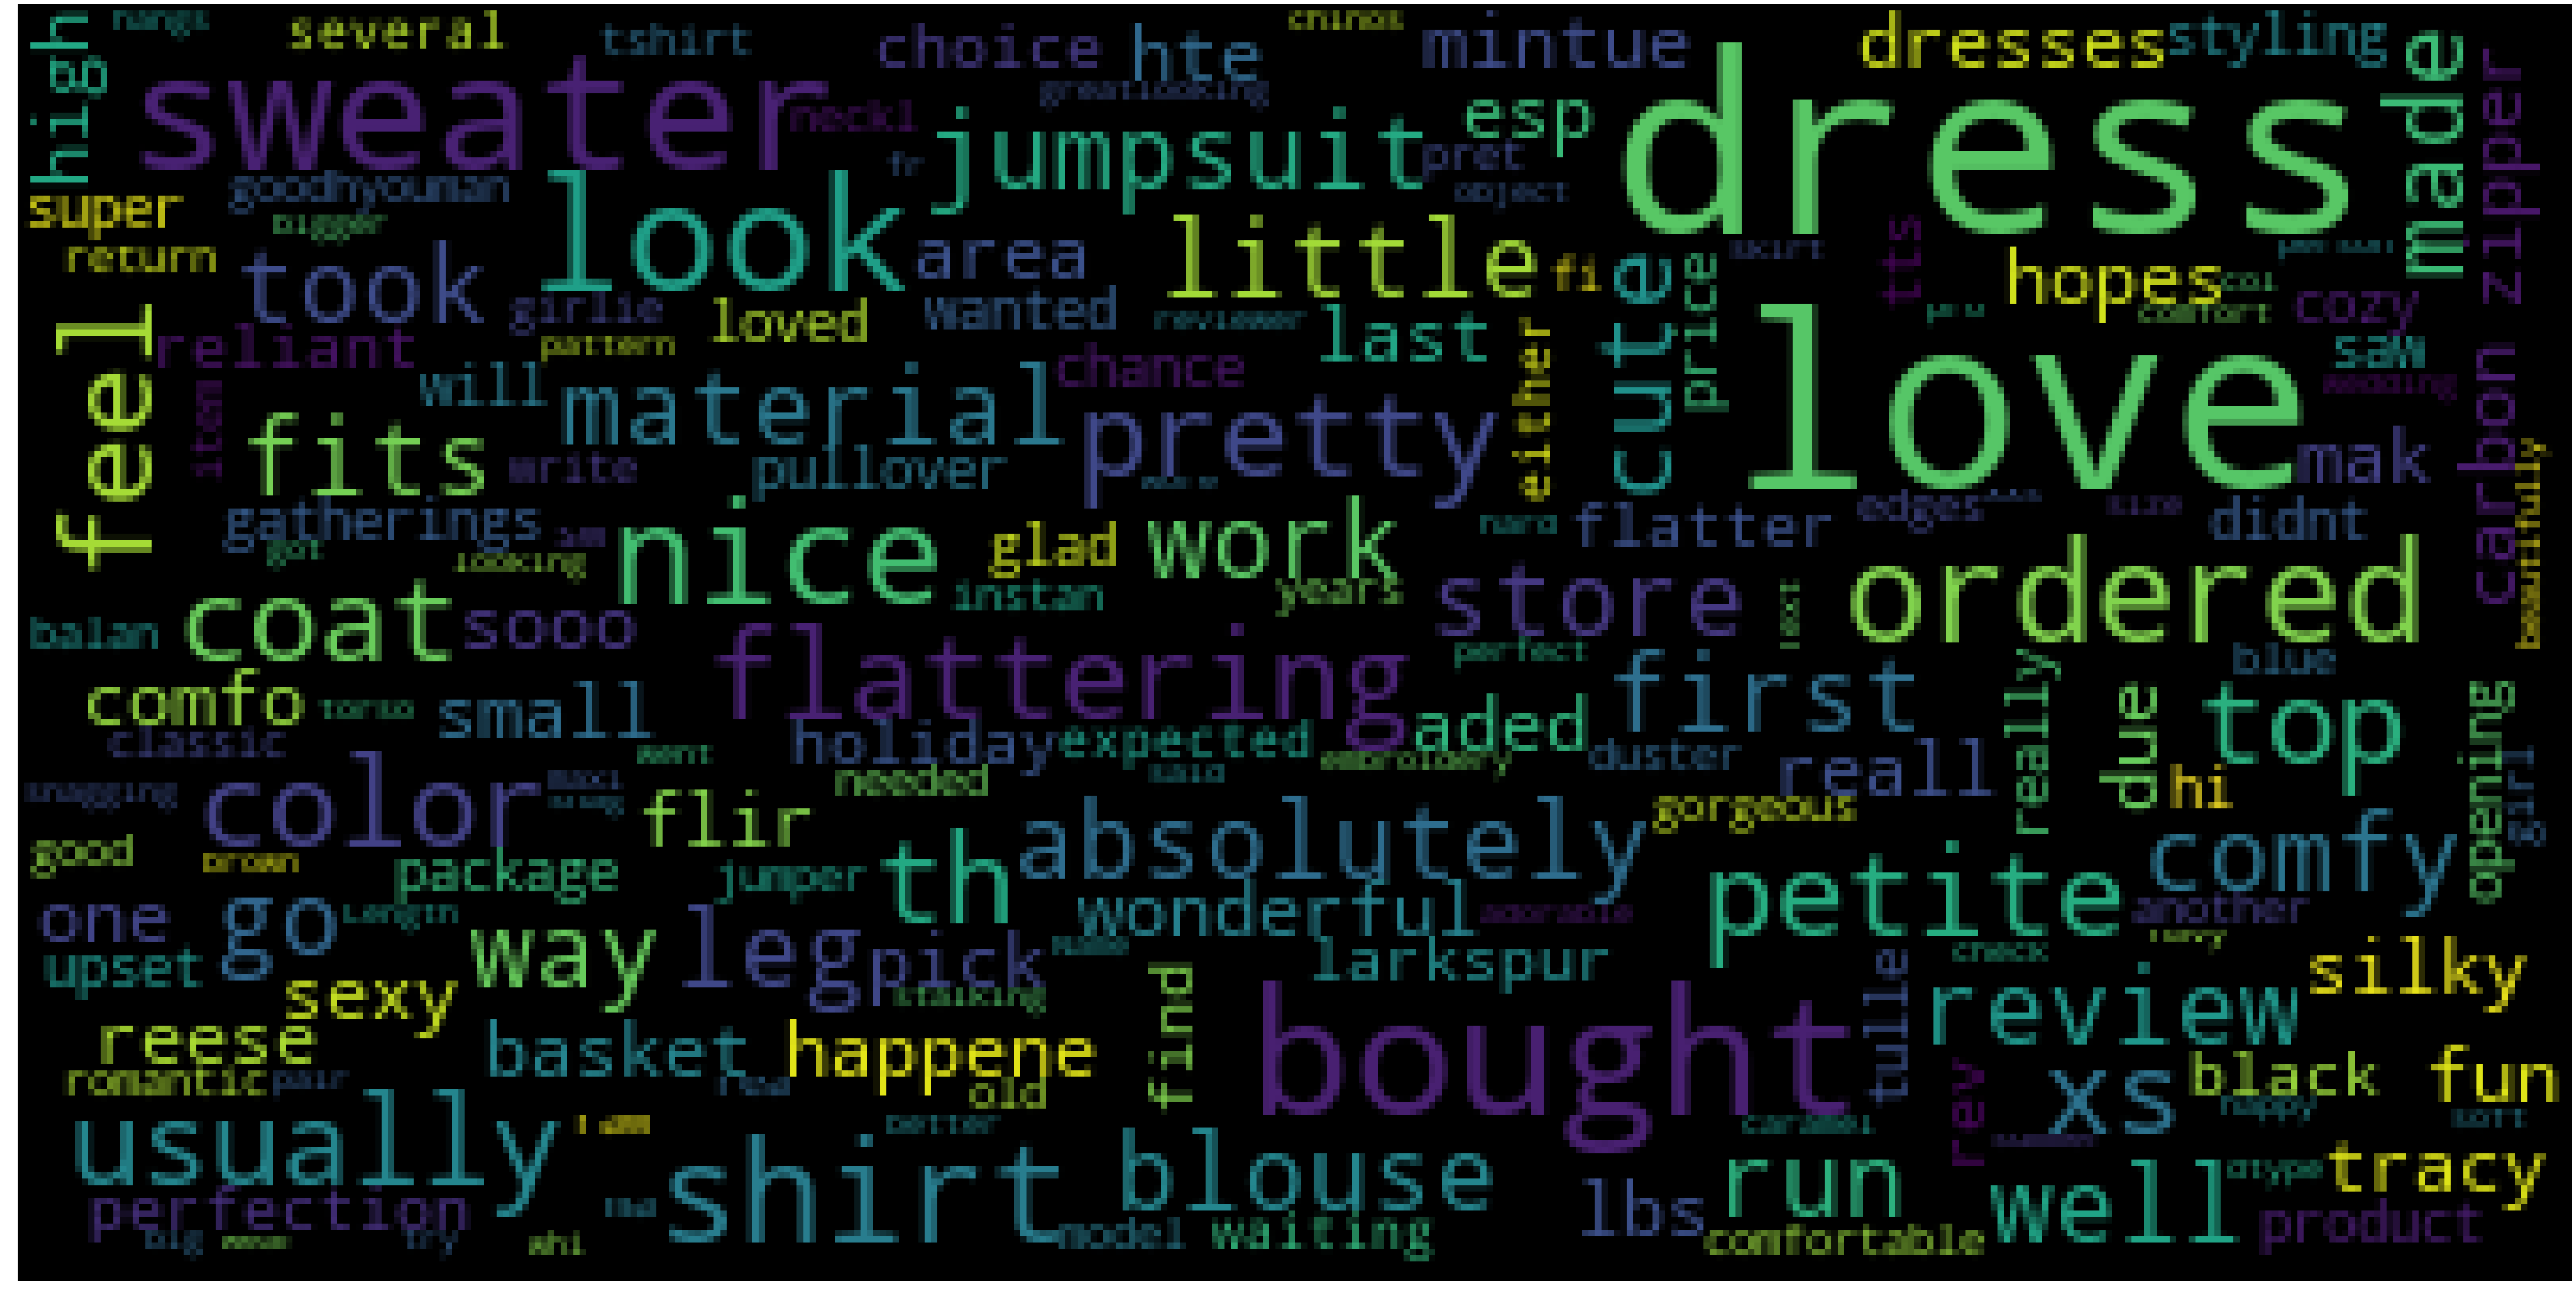

In [98]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl

mpl.rcParams['figure.figsize']=(80.0,60.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=1000           #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train["Review Text"]))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [91]:
train.head()

,Review Text,Recommended IND
0,absolutely wonderful silky and sexy and comfo...,1
1,love this dress it's sooo pretty . i happene...,1
2,i had such high hopes for this dress and reall...,0
3,i love love love this jumpsuit . it's fun flir...,1
4,this shirt is very flattering to all due to th...,1
